# Resnet Exploration

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchinfo import summary

from local.device import device, cpu
from local import resnet
from local.stats import similarity, self_similarity, null_similarity


print("PyTorch Version: ", torch.__version__)
print("Torchvision Version: ", torchvision.__version__)
print("Pytorch device: ", device)


PyTorch Version:  1.13.1
Torchvision Version:  0.14.1
Pytorch device:  cpu


In [6]:
resnet18 = resnet.resnet18()
resnet34 = resnet.resnet34()
resnet50 = resnet.resnet50()
resnet101 = resnet.resnet101()
resnet152 = resnet.resnet152()

resnets = [
    resnet18,
    resnet34,
    resnet50,
    resnet101,
    resnet152,
]

Using cache found in C:\Users\Mara/.cache\torch\hub\pytorch_vision_v0.10.0
Using cache found in C:\Users\Mara/.cache\torch\hub\pytorch_vision_v0.10.0
Using cache found in C:\Users\Mara/.cache\torch\hub\pytorch_vision_v0.10.0
Using cache found in C:\Users\Mara/.cache\torch\hub\pytorch_vision_v0.10.0
Using cache found in C:\Users\Mara/.cache\torch\hub\pytorch_vision_v0.10.0


In [5]:
summary(resnet152, [1, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [1, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           4,096
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│ 

In [4]:
[x for x,_ in resnet152.named_parameters()]

['conv1.weight',
 'bn1.weight',
 'bn1.bias',
 'layer1.0.conv1.weight',
 'layer1.0.bn1.weight',
 'layer1.0.bn1.bias',
 'layer1.0.conv2.weight',
 'layer1.0.bn2.weight',
 'layer1.0.bn2.bias',
 'layer1.0.conv3.weight',
 'layer1.0.bn3.weight',
 'layer1.0.bn3.bias',
 'layer1.0.downsample.0.weight',
 'layer1.0.downsample.1.weight',
 'layer1.0.downsample.1.bias',
 'layer1.1.conv1.weight',
 'layer1.1.bn1.weight',
 'layer1.1.bn1.bias',
 'layer1.1.conv2.weight',
 'layer1.1.bn2.weight',
 'layer1.1.bn2.bias',
 'layer1.1.conv3.weight',
 'layer1.1.bn3.weight',
 'layer1.1.bn3.bias',
 'layer1.2.conv1.weight',
 'layer1.2.bn1.weight',
 'layer1.2.bn1.bias',
 'layer1.2.conv2.weight',
 'layer1.2.bn2.weight',
 'layer1.2.bn2.bias',
 'layer1.2.conv3.weight',
 'layer1.2.bn3.weight',
 'layer1.2.bn3.bias',
 'layer2.0.conv1.weight',
 'layer2.0.bn1.weight',
 'layer2.0.bn1.bias',
 'layer2.0.conv2.weight',
 'layer2.0.bn2.weight',
 'layer2.0.bn2.bias',
 'layer2.0.conv3.weight',
 'layer2.0.bn3.weight',
 'layer2.0.bn3.b

In [5]:
list(map(
    lambda x: x.to(cpu) and x.eval() and x.conv1,
    resnets
))

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)]

In [6]:
resnet152

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

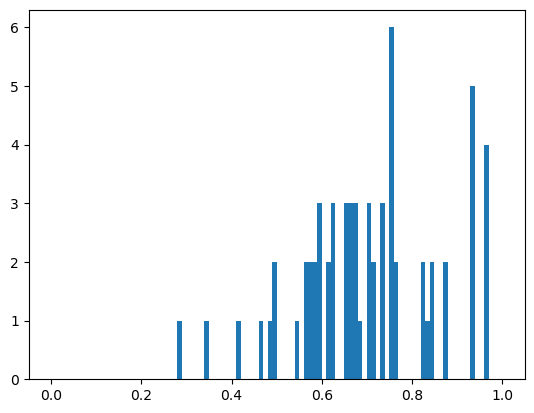

In [7]:
self_similarity(resnet50.get_parameter('conv1.weight'))

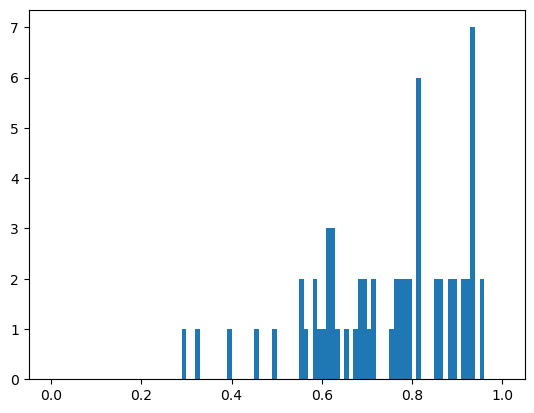

In [8]:
self_similarity(resnet101.get_parameter('conv1.weight'))

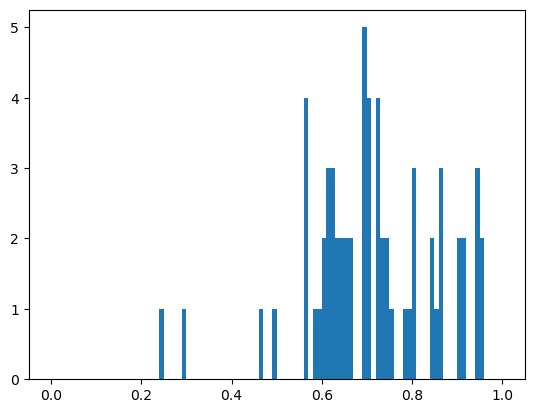

In [9]:
self_similarity(resnet152.get_parameter('conv1.weight'))

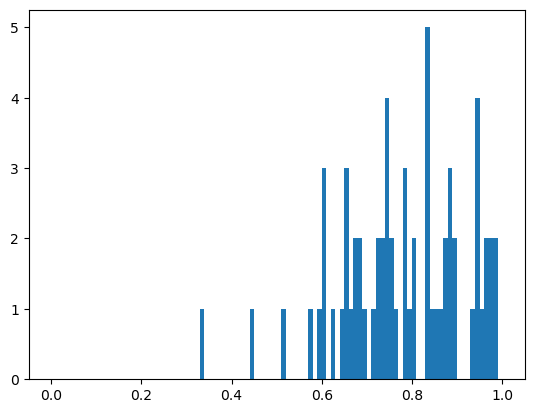

In [10]:
similarity(resnet50.get_parameter('conv1.weight'), resnet152.get_parameter('conv1.weight'))

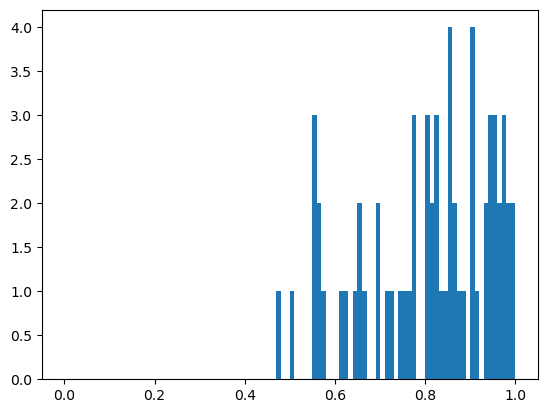

In [11]:
similarity(resnet101.get_parameter('conv1.weight'), resnet152.get_parameter('conv1.weight'))


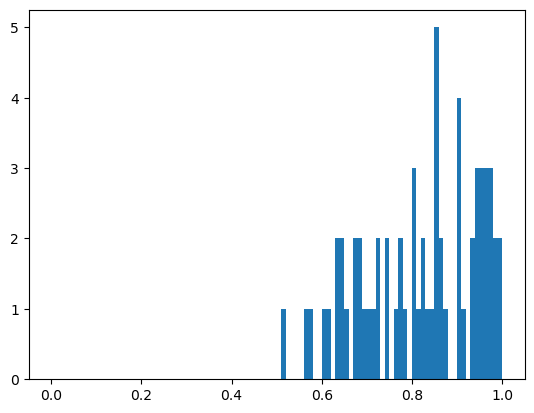

In [12]:
similarity(resnet152.get_parameter('conv1.weight'), resnet101.get_parameter('conv1.weight'))

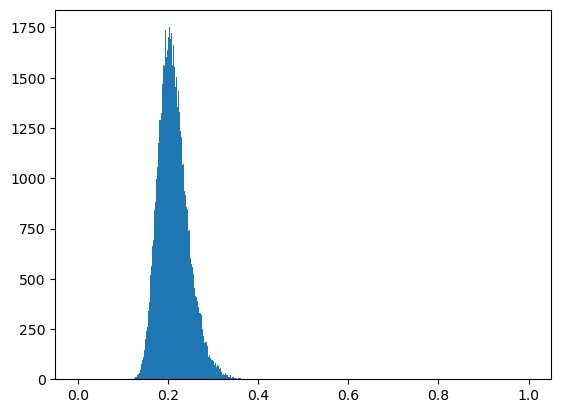

In [13]:
null_similarity(resnet50.get_parameter('conv1.weight'))

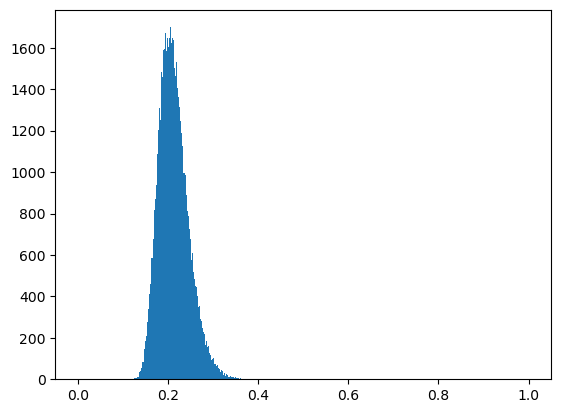

In [14]:
null_similarity(resnet101.get_parameter('conv1.weight'))

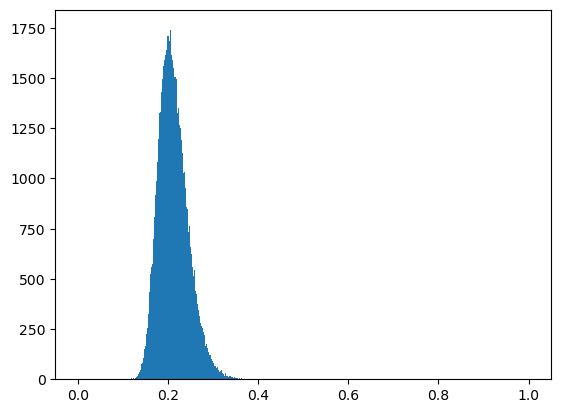

In [15]:
null_similarity(resnet152.get_parameter('conv1.weight'))
